Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 38.8min finished





Best: 0.803431 using {'batch_size': 16, 'epochs': 100}


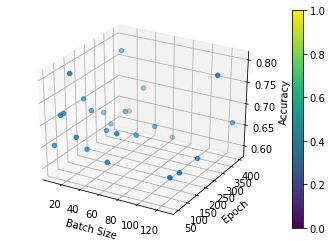

In [124]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
from numpy.random import seed
import tensorflow
from numpy import loadtxt
import itertools
from matplotlib import pyplot as plt
from urllib.request import urlopen
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


# load dataset
url = 'https://raw.githubusercontent.com/manazirahsan1/Fetal-Health-Classification/main/fetal_health.csv'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",", skiprows=1)
num_features = len(dataset[0, :]) - 1

# split into input (X) and output (Y) variables
X = dataset[:, 0:num_features]
Y = dataset[:, num_features]


# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_features, activation='relu'))
    model.add(Dense(6, input_dim=30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 65
numpy.random.seed(seed)
tensorflow.random.set_seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [8, 16, 32, 64, 128]
epochs = [50, 100, 200, 300, 400]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4, verbose=2)
grid_result = grid.fit(X, Y)

# summarize results
print("\n\n\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

x = []
y = []
for a, b in itertools.product(batch_size, epochs):
    x.append(a)
    y.append(b)


plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(x, y, grid_result.cv_results_['mean_test_score'])
ax.set_xlabel('Batch Size')
ax.set_ylabel('Epoch')
ax.set_zlabel('Accuracy')
fig.colorbar(p, ax=ax)


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  5.5min finished


Best: 0.778540 using {'learn_rate': 0.0005}


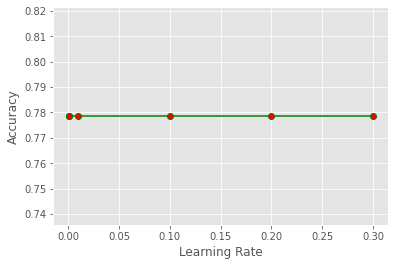

In [648]:
# Use scikit-learn to grid search the learning rate
import numpy
from numpy.random import seed
import tensorflow
from numpy import loadtxt
import itertools
from matplotlib import pyplot as plt
from urllib.request import urlopen
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD


# load dataset
url = 'https://raw.githubusercontent.com/manazirahsan1/Fetal-Health-Classification/main/fetal_health.csv'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",", skiprows=1)
num_features = len(dataset[0, :]) - 1

# split into input (X) and output (Y) variables
X = dataset[:, 0:num_features]
Y = dataset[:, num_features]


# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_features, activation='relu'))
    model.add(Dense(6, input_dim=30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 65
numpy.random.seed(seed)
tensorflow.random.set_seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=0)

# define the grid search parameters
learning_rate = [.0005, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learning_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4, verbose=2)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

plt.style.use('ggplot')
plt.plot(learning_rate, grid_result.cv_results_['mean_test_score'], color='green', linestyle='solid', marker='o', markerfacecolor='red')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

In [160]:
# Use scikit-learn to grid search the optimizer
import numpy as np
from numpy.random import seed
import tensorflow
from numpy import loadtxt
import itertools
from matplotlib import pyplot as plt
from urllib.request import urlopen
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


# load dataset
url = 'https://raw.githubusercontent.com/manazirahsan1/Fetal-Health-Classification/main/fetal_health.csv'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",", skiprows=1)
num_features = len(dataset[0, :]) - 1

# split into input (X) and output (Y) variables
X = dataset[:, 0:num_features]
Y = dataset[:, num_features]


# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_features, activation='relu'))
    model.add(Dense(6, input_dim=30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 65
numpy.random.seed(seed)
tensorflow.random.set_seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4, verbose=2)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  7.0min finished


Best: 0.780361 using {'optimizer': 'Nadam'}


In [205]:
# Use scikit-learn to grid search the activation function
import numpy as np
from numpy.random import seed
import tensorflow
from numpy import loadtxt
import itertools
from matplotlib import pyplot as plt
from urllib.request import urlopen
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


# load dataset
url = 'https://raw.githubusercontent.com/manazirahsan1/Fetal-Health-Classification/main/fetal_health.csv'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",", skiprows=1)
num_features = len(dataset[0, :]) - 1

# split into input (X) and output (Y) variables
X = dataset[:, 0:num_features]
Y = dataset[:, num_features]


# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_features, activation='relu'))
    model.add(Dense(6, input_dim=30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 65
numpy.random.seed(seed)
tensorflow.random.set_seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=0)

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4, verbose=2)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:  7.6min finished


Best: 0.807662 using {'activation': 'softmax'}


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 27.6min finished


Best: 0.725742 using {'dropout_rate': 0.6}


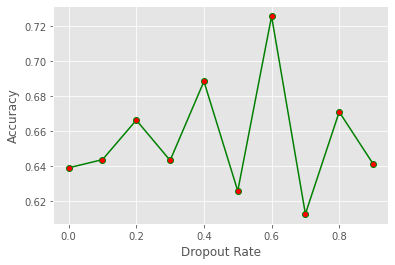

In [706]:
# Use scikit-learn to grid search the dropout rate
import numpy as np
from numpy.random import seed
import tensorflow
from numpy import loadtxt
import itertools
from matplotlib import pyplot as plt
from urllib.request import urlopen
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm


# load dataset
url = 'https://raw.githubusercontent.com/manazirahsan1/Fetal-Health-Classification/main/fetal_health.csv'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",", skiprows=1)
num_features = len(dataset[0, :]) - 1

# split into input (X) and output (Y) variables
X = dataset[:, 0:num_features]
Y = dataset[:, num_features]


# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=num_features, activation='relu'))
    model.add(Dense(6, input_dim=30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# fix random seed for reproducibility
seed = 65
numpy.random.seed(seed)
tensorflow.random.set_seed(seed)


# create model
model = KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)

# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=4, verbose=2)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

plt.style.use('ggplot')
plt.plot(dropout_rate, grid_result.cv_results_['mean_test_score'], color='green', linestyle='solid', marker='o', markerfacecolor='red')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.show()

In [802]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# fix manual seed for reproducibility
seed = 65
np.random.seed(seed)
torch.manual_seed(seed)

In [803]:
df = pd.read_csv("https://raw.githubusercontent.com/manazirahsan1/Fetal-Health-Classification/main/fetal_health.csv")
# df.head() 
# sns.countplot(x = 'fetal_health', data=df)

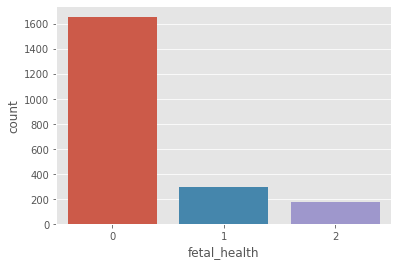

In [804]:
class2idx = {
    1:0,
    2:1,
    3:2
}
idx2class = {v: k for k, v in class2idx.items()}
df['fetal_health'].replace(class2idx, inplace=True)
sns.countplot(x = 'fetal_health', data=df)

In [805]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [806]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X,
                                                          y,
                                                          test_size=0.2,
                                                          stratify=y,
                                                          random_state=65)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval,
                                                  y_trainval,
                                                  test_size=0.1,
                                                  stratify=y_trainval,
                                                  random_state=65)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

Text(0.5, 1.0, 'Class Distribution in Test Set')

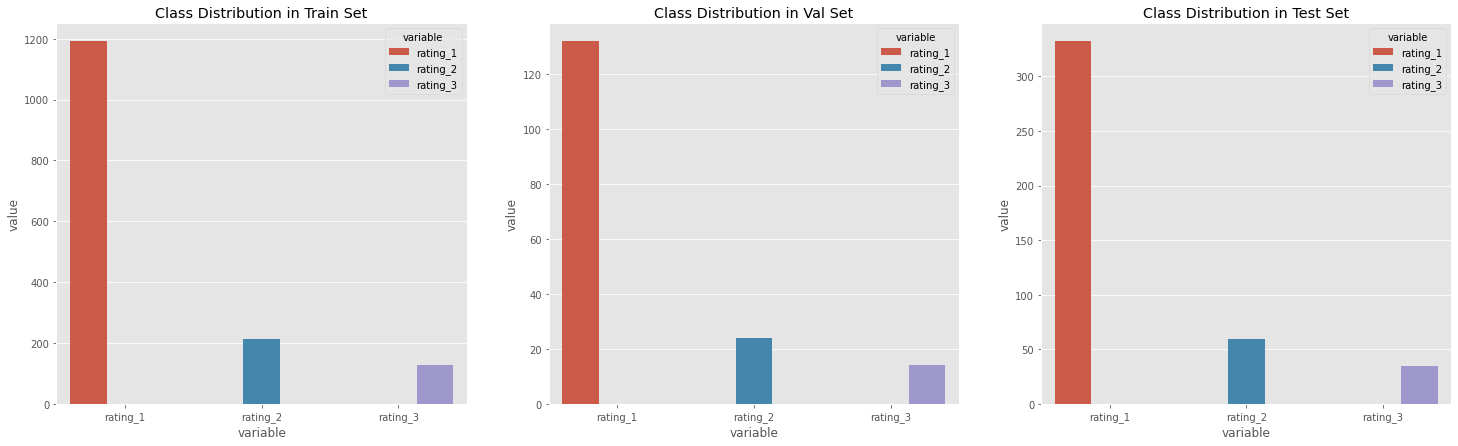

In [807]:
def get_class_distribution(obj):
    count_dict = {
        "rating_1": 0,
        "rating_2": 0,
        "rating_3": 0
    }
    for i in obj:
        if i == 0: 
            count_dict['rating_1'] += 1
        elif i == 1: 
            count_dict['rating_2'] += 1
        elif i == 2: 
            count_dict['rating_3'] += 1
        else:
            print("Check classes.")
    return count_dict


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')


In [808]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [809]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 

class_weights_all = class_weights[target_list]

weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [810]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.0005
DROPOUT_PROBILITY = 0.05
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 3

In [811]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [812]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 30)
        # self.layer_2 = nn.Linear(100, 20)
        self.layer_3 = nn.Linear(30, 6)
        self.layer_out = nn.Linear(6, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=DROPOUT_PROBILITY)
        self.batchnorm1 = nn.BatchNorm1d(30)
        # self.batchnorm2 = nn.BatchNorm1d(20)
        self.batchnorm3 = nn.BatchNorm1d(6)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        # x = self.layer_2(x)
        # x = self.batchnorm2(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [813]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)

model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# print(model)

In [814]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [815]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [816]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


Epoch 001: | Train Loss: 1.11665 | Val Loss: 1.06953 | Train Acc: 30.885| Val Acc: 37.647
Epoch 002: | Train Loss: 0.94146 | Val Loss: 1.03754 | Train Acc: 42.542| Val Acc: 45.294
Epoch 003: | Train Loss: 0.88893 | Val Loss: 0.99877 | Train Acc: 48.083| Val Acc: 47.647
Epoch 004: | Train Loss: 0.85404 | Val Loss: 0.95341 | Train Acc: 52.406| Val Acc: 54.706
Epoch 005: | Train Loss: 0.80301 | Val Loss: 0.92635 | Train Acc: 59.698| Val Acc: 58.824
Epoch 006: | Train Loss: 0.74852 | Val Loss: 0.85212 | Train Acc: 67.844| Val Acc: 70.000
Epoch 007: | Train Loss: 0.70676 | Val Loss: 0.80572 | Train Acc: 71.917| Val Acc: 70.588
Epoch 008: | Train Loss: 0.67177 | Val Loss: 0.76896 | Train Acc: 71.448| Val Acc: 70.000
Epoch 009: | Train Loss: 0.63666 | Val Loss: 0.68014 | Train Acc: 74.927| Val Acc: 75.294
Epoch 010: | Train Loss: 0.59965 | Val Loss: 0.67030 | Train Acc: 76.802| Val Acc: 75.294
Epoch 011: | Train Loss: 0.55743 | Val Loss: 0.60245 | Train Acc: 80.292| Val Acc: 77.059
Epoch 012:

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

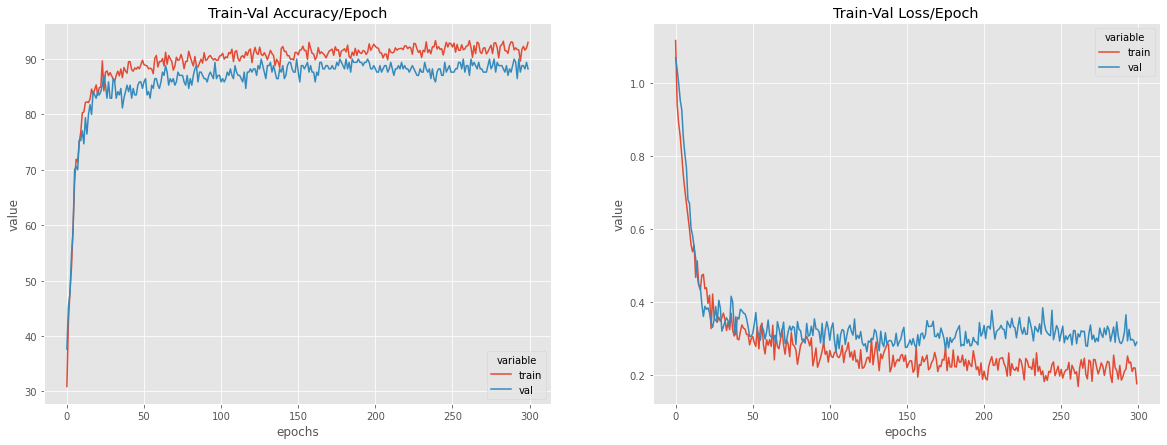

In [817]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [818]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

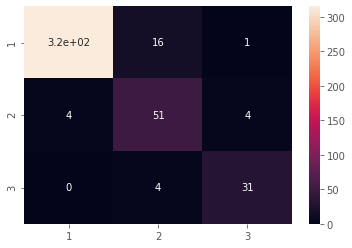

In [819]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list)).rename(columns=idx2class, index=idx2class)
sns.heatmap(confusion_matrix_df, annot=True)

In [820]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       332
           1       0.72      0.86      0.78        59
           2       0.86      0.89      0.87        35

    accuracy                           0.93       426
   macro avg       0.86      0.90      0.88       426
weighted avg       0.94      0.93      0.93       426

